In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import plotly.tools as tls
import plotly.plotly as py
import cufflinks as cf
# print(cf.__version__)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import plot, iplot
import seaborn as sns

%matplotlib inline

# ------------------------------------------------------------------------
tls.set_credentials_file(username='NaomiMachado',api_key='4BHQNShvzY23VXSO41qj')
# -------------------------------------------------------------------------

In [2]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

# Data Analysis

In [3]:
BlackFridayTrain = pd.read_csv('train.csv')

In [4]:
BlackFridayTrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
BlackFridayTrain.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
BlackFridayTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
BlackFridayTrain.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
BlackFridayTrain.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Distribution of the dataset based on features

In [9]:
BlackFridayTrain.groupby('Gender').size().iplot(kind='bar', title='Gender Distribution', color='red')

In [10]:
BlackFridayTrain.groupby('Age').size().iplot(kind='bar', title='Age Distribution')

In [11]:
BlackFridayTrain.groupby('Occupation').size().iplot(kind='bar', title='Occupation Distribution', color='green')

In [12]:
BlackFridayTrain.groupby('City_Category').size().iplot(kind='bar', title='City Category Distribution', color='blue')

In [13]:
BlackFridayTrain.groupby('Stay_In_Current_City_Years').size().iplot(kind='bar', title='Stay In Current City Years Distribution', color='purple')

In [14]:
BlackFridayTrain.groupby('Marital_Status').size().iplot(kind='bar', title='Marital Status Distribution', color='navy')

## Purchase Amount Distribution based on Dataset features

In [15]:
BlackFridayTrain.groupby(['Gender'])['Purchase'].sum().iplot(kind='bar', title="Gender Distribution of the data", color='red')

In [16]:
BlackFridayTrain.groupby(['Age'])['Purchase'].sum().iplot(kind='bar', title="Age Distribution of the data")

In [17]:
BlackFridayTrain.groupby(['Occupation'])['Purchase'].sum().iplot(kind='bar', title="Occupation Distribution of the data", color='green')

In [18]:
BlackFridayTrain.groupby('City_Category')['Purchase'].sum().iplot(kind='bar', title="City Category Distribution of the data", color='blue')

In [19]:
BlackFridayTrain.groupby('Stay_In_Current_City_Years')['Purchase'].sum().iplot(kind='bar', title="Stay Duration Distribution of the data", color='purple')

In [20]:
BlackFridayTrain.groupby('Marital_Status')['Purchase'].sum().iplot(kind='bar', title="Marital Status Distribution of the data", color='navy')

In [21]:
ageVsGender = BlackFridayTrain.groupby(['Age', 'Gender'])['Purchase'].sum()

In [22]:
ageVsGender

Age    Gender
0-17   F           42385978
       M           92527205
18-25  F          205475842
       M          708372833
26-35  F          442976233
       M         1588794345
36-45  F          243438963
       M          783130921
46-50  F          116706864
       M          304136539
51-55  F           89465997
       M          277633647
55+    F           45782765
       M          154984610
Name: Purchase, dtype: int64

In [24]:
males = go.Bar(
    x=['0-17', '18-25', '26-35', '36-45','46-55', '55+'],
    y=[92527205, 708372833, 1588794345, 783130921, 304136539, 277633647, 154984610],
    name='Male-AgeGroup Purchases',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.8
)

females = go.Bar(
    x=['0-17', '18-25', '26-35', '36-45','46-55', '55+'],
    y=[42385978, 205475842, 442976233, 243438963, 116706864, 89465997, 45782765],
    name='Female-AgeGroup Purchases',
    marker=dict(
        color='rgb(255, 153, 153)',
        line=dict(
            color='rgb(132, 46, 46)',
            width=1.5,
        )
    ),
    opacity=0.8
)

data = [males, females]
layout = go.Layout(
    barmode='grouped'
)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'barmode' property of layout
        Received value: 'grouped'

    The 'barmode' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['stack', 'group', 'overlay', 'relative']

In [25]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

NameError: name 'layout' is not defined

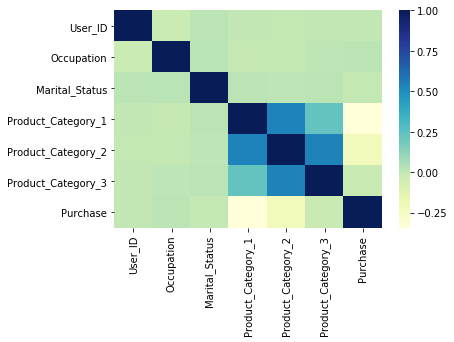

In [25]:
sns.heatmap(data=BlackFridayTrain.corr(), cmap="YlGnBu")

# Data Preprocessing

In [44]:
BlackFridayTrain['Product_Category_2'].fillna(0, inplace=True)
BlackFridayTrain['Product_Category_3'].fillna(0, inplace=True)

BlackFridayTrain['Product_Category_2'] = BlackFridayTrain['Product_Category_2'].astype(int)
BlackFridayTrain['Product_Category_3'] = BlackFridayTrain['Product_Category_3'].astype(int)

In [45]:
BlackFridayTrainNew = BlackFridayTrain.copy(deep=True)

BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'F', 'Gender'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Gender'] == 'M', 'Gender'] = 1

BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '0-17', 'Age'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '18-25', 'Age'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '26-35', 'Age'] = 2
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '36-45', 'Age'] = 3
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '46-50', 'Age'] = 4
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '51-55', 'Age'] = 5
BlackFridayTrainNew.loc[BlackFridayTrainNew['Age'] == '55+', 'Age'] = 6

BlackFridayTrainNew.loc[BlackFridayTrainNew['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4

BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'A', 'City_Category'] = 0
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'B', 'City_Category'] = 1
BlackFridayTrainNew.loc[BlackFridayTrainNew['City_Category'] == 'C', 'City_Category'] = 2


BlackFridayTrainNew['Gender'] = BlackFridayTrainNew['Gender'].astype(int)
BlackFridayTrainNew['Age'] = BlackFridayTrainNew['Age'].astype(int)
BlackFridayTrainNew['City_Category'] = BlackFridayTrainNew['City_Category'].astype(int)
BlackFridayTrainNew['Stay_In_Current_City_Years'] = BlackFridayTrainNew['Stay_In_Current_City_Years'].astype(int)

In [46]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [47]:
BlackFridayTrainNew.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [48]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [49]:
conditions = [
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] == 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] == 0),
    (BlackFridayTrainNew['Product_Category_1'] != 0) & (BlackFridayTrainNew['Product_Category_2'] != 0) & (BlackFridayTrainNew['Product_Category_3'] != 0)]
choices = [1, 2, 3]
BlackFridayTrainNew['Category_Count'] = np.select(conditions, choices, default=0)

In [50]:
BlackFridayTrainNew['Product_Score'] = 0.0
required_product_data = BlackFridayTrainNew[['Product_ID', 'Product_Score']]

required_product_data['Frequency'] = 1

grouped_product_data = required_product_data.groupby(['Product_ID']).sum()
grouped_product_data = grouped_product_data.reset_index()

grouped_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.0,1152
1,P00000242,0.0,376
2,P00000342,0.0,244
3,P00000442,0.0,92
4,P00000542,0.0,149


In [51]:
max_frequency = grouped_product_data['Frequency'].max()

final_product_data = grouped_product_data[['Product_ID', 'Product_Score', 'Frequency']]

for index, row in final_product_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_product_data.set_value(index, 'Product_Score', product_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [52]:
final_product_data.head()

,Product_ID,Product_Score,Frequency
0,P00000142,0.612766,1152
1,P00000242,0.200000,376
2,P00000342,0.129787,244
3,P00000442,0.048936,92
4,P00000542,0.079255,149


In [53]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Product_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1,0.0
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3,0.0
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1,0.0
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2,0.0
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1,0.0


In [54]:
for index, row in BlackFridayTrainNew.iterrows():
    p_score = final_product_data.loc[final_product_data.Product_ID == row['Product_ID'], 'Product_Score'].values[0]
    BlackFridayTrainNew.set_value(index, 'Product_Score', p_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [55]:
BlackFridayTrainNew['User_Score'] = 0.0
required_user_data = BlackFridayTrainNew[['User_ID', 'User_Score']]

required_user_data['Frequency'] = 1

grouped_user_data = required_user_data.groupby(['User_ID']).sum()
grouped_user_data = grouped_user_data.reset_index()

grouped_user_data.head()

,User_ID,User_Score,Frequency
0,1000001,0.0,35
1,1000002,0.0,77
2,1000003,0.0,29
3,1000004,0.0,14
4,1000005,0.0,106


In [56]:
max_frequency = grouped_user_data['Frequency'].max()

final_user_data = grouped_user_data[['User_ID', 'User_Score', 'Frequency']]

for index, row in final_user_data.iterrows():
    product_score = (float(row['Frequency']) / float(max_frequency))
    final_user_data.set_value(index, 'User_Score', product_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [57]:
for index, row in BlackFridayTrainNew.iterrows():
    p_score = final_user_data.loc[final_user_data.User_ID == row['User_ID'], 'User_Score'].values[0]
    BlackFridayTrainNew.set_value(index, 'User_Score', p_score)

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [58]:
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Category_Count,Product_Score,User_Score
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370,1,0.120745,0.034113
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200,3,0.309043,0.034113
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422,1,0.054255,0.034113
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057,2,0.181383,0.034113
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969,1,0.107979,0.075049


In [59]:
cols = list(BlackFridayTrainNew)
# move the column to head of list using index, pop and insert
cols.insert(14, cols.pop(cols.index('Purchase')))
cols

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Category_Count',
 'Product_Score',
 'User_Score',
 'Purchase']

In [60]:
# use loc to reorder
BlackFridayTrainNew = BlackFridayTrainNew.loc[:, cols]
BlackFridayTrainNew.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,1,0.120745,0.034113,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,3,0.309043,0.034113,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1,0.054255,0.034113,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,2,0.181383,0.034113,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,1,0.107979,0.075049,7969


In [61]:
BlackFridayTrainNew.to_csv('BlackFridayTrainNew.csv')

In [62]:
BlackFridayTrainNew.corr()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_Count,Product_Score,User_Score,Purchase
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.003896,0.003605,0.004270,0.003688,-0.032458,0.004716
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.000954,0.036146,0.026808,0.020456,0.073517,0.060346
Age,0.032698,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.018770,-0.007422,-0.021246,-0.020741,-0.060446,0.015839
Occupation,-0.023971,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.006712,0.012269,0.011600,0.011679,-0.002929,0.020833
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.016003,0.035525,0.040739,0.109546,-0.522198,0.061914
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.002735,0.001470,-0.000280,0.005422
Marital_Status,0.020443,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.011257,-0.010415,0.000678,-0.000463
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.518270,-0.205178,0.017748,-0.343703
Product_Category_2,0.003896,-0.000954,0.018770,0.006712,0.016003,0.001262,0.001099,-0.067877,1.000000,0.094750,0.444873,0.098062,-0.027482,0.052288
Product_Category_3,0.003605,0.036146,-0.007422,0.012269,0.035525,0.001977,-0.004629,-0.385534,0.094750,1.000000,0.791044,0.262332,-0.050203,0.288501


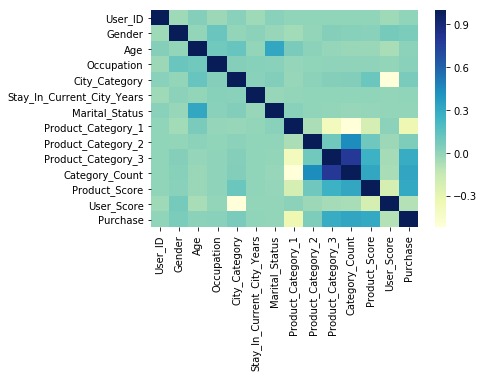

In [63]:
sns.heatmap(data=BlackFridayTrainNew.corr(), cmap="YlGnBu")

In [64]:
BlackFridayTrainNew = pd.read_csv('BlackFridayTrainNew.csv')


### Testing on Model on Actual Data

In [69]:
BlackFridayTestNew = pd.read_csv('BlackFridayTestNew.csv')

In [70]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [71]:
X = BlackFridayTrainNew.drop(['Purchase','Product_ID'], axis=1)
y = BlackFridayTrainNew['Purchase']

### Ridge

In [72]:
from sklearn.linear_model import Lasso

## training the model
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X,y)
predictions = lassoReg.predict(x_test)

finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

finalsolution.to_csv('finalsolution_Lasso.csv')

### Lasso

In [73]:
from sklearn.linear_model import Ridge

x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X,y)
predictions = ridgeReg.predict(x_test)

finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

finalsolution.to_csv('finalsolution_Ridge.csv')

### ElasticNet

In [74]:
from sklearn.linear_model import ElasticNet

## training the model
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(X,y)
predictions = ENreg.predict(x_test)

finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

finalsolution.to_csv('finalsolution_ElasticNet.csv')

In [75]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [77]:
lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

## Linear Regression

In [78]:
from sklearn import linear_model

In [79]:
regr = linear_model.LinearRegression(normalize=True)

In [80]:
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [81]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [82]:
BlackFridayTest = pd.read_csv('test.csv')

In [83]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [84]:
y_pred = regr.predict(x_test)

In [85]:
print(y_pred)

[12032.01770737  9618.10786184  7858.65628075 ... 10308.60442759
  6779.82362646  9273.15331225]


In [86]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [87]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-3.64127545e-04  1.30435389e-02  4.93752896e+02  1.28755882e+02
  4.96237676e+00  6.42623954e+01  1.17731973e+01 -3.30460078e+01
 -2.85105787e+02 -2.99400313e+01  5.36214307e+01  6.53028141e+02
  5.43790704e+03 -8.94026334e+02]


In [88]:
finalsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,12032.017707
1,1000009,P00113442,9618.107862
2,1000010,P00288442,7858.656281
3,1000010,P00145342,7853.968770
4,1000011,P00053842,10678.120801


In [89]:
finalsolution.count()

User_ID       233599
Product_ID    233599
Purchase      233599
dtype: int64

In [90]:
finalsolution.to_csv('finalsolution_LinearRegression.csv')

### Result - RMSE 4620.something currently
### Best Solution on Leaderboards - RMSE 2405.something

### ExtraTree Regressor

In [91]:
from sklearn.ensemble import ExtraTreesRegressor

In [92]:
eTreeReg = ExtraTreesRegressor(n_estimators=6)

eTreeReg.fit(X,y)

y_pred = eTreeReg.predict(x_test)

In [93]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [94]:
finalsolution.to_csv('finalsolution_eTreeReg.csv')

In [95]:
eTreeReg

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

### n_estimators = RMSE 10 : 2927.62

## Random Forest

In [96]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()

In [97]:
# Train the model on training data
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [98]:
X_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [99]:
y_pred = rf.predict(X_test)

In [100]:
print(y_pred)

[16770.9 11457.   6887.8 ...  8472.6 17079.9  2201. ]


In [101]:
BlackFridayTestNew['User_ID'].shape

(233599,)

In [102]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [103]:
finalsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,16770.9
1,1000009,P00113442,11457.0
2,1000010,P00288442,6887.8
3,1000010,P00145342,2319.6
4,1000011,P00053842,2807.6


In [104]:
finalsolution.to_csv('finalsolution_RandomForest.csv')

### Result - RMSE 3047.something currently (Random Forest)
### Best Solution on Leaderboards - RMSE 2405.something

## After adding the product score
### Result - RMSE 3010.something currently (Random Forest)
### Best Solution on Leaderboards - RMSE 2405.something
### n_esitmators = 	20 :  RMSE 2914.72
### n estimators = 8 : RMSE	3009.87

In [105]:
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

ModuleNotFoundError: No module named 'tensorflow'

In [106]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NameError: name 'Sequential' is not defined

In [107]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

NameError: name 'ModelCheckpoint' is not defined

In [ ]:
NN_model.fit(X, y, epochs=1, batch_size=16, validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
# Load wights file of the best model :
wights_file = 'Weights-005--3903.65557.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
predictions = NN_model.predict(X_test)

In [ ]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = predictions

In [ ]:
finalsolution.head()

In [ ]:
finalsolution.to_csv('finalsolution_TensorFlow.csv')

## XGBoost

In [101]:
import xgboost

In [102]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                       550068 non-null int64
Gender                        550068 non-null int32
Age                           550068 non-null int32
Occupation                    550068 non-null int64
City_Category                 550068 non-null int32
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int32
Product_Category_3            550068 non-null int32
Category_Count                550068 non-null int32
Product_Score                 550068 non-null float64
User_Score                    550068 non-null float64
dtypes: float64(2), int32(7), int64(4)
memory usage: 39.9 MB


In [104]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [105]:
x_test = BlackFridayTestNew.drop(['Product_ID'], axis=1)

In [106]:
predictions = xgb.predict(x_test)

In [107]:
xgboostsolution = BlackFridayTestNew[['User_ID','Product_ID']]
xgboostsolution['Purchase'] = predictions

In [108]:
finalsolution.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,10438.294530
1,1000009,P00113442,9713.420537
2,1000010,P00288442,8728.293292
3,1000010,P00145342,9012.943524
4,1000011,P00053842,10880.052661


In [109]:
xgboostsolution.to_csv('finalsolution_XGBoost.csv')

### rmse - 2779.something with 
### rank - 580 among 13000+ participants

In [73]:
import h2o

# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.192-b12, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\vivid\AppData\Local\Temp\tmpgmbbct3l
  JVM stdout: C:\Users\vivid\AppData\Local\Temp\tmpgmbbct3l\h2o_vivid_started_from_python.out
  JVM stderr: C:\Users\vivid\AppData\Local\Temp\tmpgmbbct3l\h2o_vivid_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_vivid_fzd67x
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [74]:
train = h2o.import_file("BlackFridayTrainNew.csv")
test = h2o.import_file("BlackFridayTestNew.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [76]:
from h2o.automl import H2OAutoML

In [79]:
x = train.columns
y = 'Purchase'
x.remove('Purchase')

In [80]:
x

['C1',
 'User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Category_Count',
 'Product_Score',
 'User_Score']

In [81]:
aml = H2OAutoML(max_models= 5, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [82]:
preds = aml.leader.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


C:\ProgramData\Anaconda3\lib\site-packages\h2o\job.py:69: UserWarning:

Test/Validation dataset column 'Product_ID' has levels not trained on: [P00012642, P00013042, P00030342, P00038942, P00039042, P00042642, P00056942, P00058842, P00061642, P00062242, P00062542, P00063942, P00074942, P00077642, P00082142, P00082642, P00092742, P00100242, P00105742, P00106242, P00140842, P00156942, P00165542, P00166542, P00168242, P00172942, P00204642, P00227242, P00236842, P00239542, P00249942, P00253842, P00268942, P00270342, P00279042, P00294942, P00300142, P00306842, P00309842, P00312642, P00315342, P00322642, P00322842, P00336842, P00359842, P0099542]



In [88]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_2_AutoML_20181203_151940


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 6532575.379125178
RMSE: 2555.8903300269317
MAE: 1897.4499153815755
RMSLE: NaN
Mean Residual Deviance: 6532575.379125178

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 6826208.214071142
RMSE: 2612.701325079302
MAE: 1938.8103352650348
RMSLE: NaN
Mean Residual Deviance: 6826208.214071142

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 6723164.146122221
RMSE: 2592.9065054726175
MAE: 1922.8079390311614
RMSLE: NaN
Mean Residual Deviance: 6723164.146122221
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,1922.808,4.1943297,1933.6583,1916.7107,1920.0469,1924.2003,1919.4235
mean_residual_deviance,6723164.0,27690.582,6789579.0,6704467.0,6683633.0,6744673.0,6693468.0
mse,6723164.0,27690.582,6789579.0,6704467.0,6683633.0,6744673.0,6693468.0
r2,0.7332429,0.0010473,0.7315218,0.7348315,0.7343926,0.7313848,0.734084
residual_deviance,6723164.0,27690.582,6789579.0,6704467.0,6683633.0,6744673.0,6693468.0
rmse,2592.8955,5.33433,2605.6821,2589.2986,2585.2725,2597.0508,2587.1738
rmsle,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-12-03 15:55:57,2 min 53.765 sec,0.0,5020.3211013,4067.9847648,25203623.9601907,5047.6884131,4090.1236340,25479158.3156621
,2018-12-03 15:55:58,2 min 55.024 sec,5.0,3880.9232210,3073.8307506,15061565.0473033,3907.3808312,3098.2221413,15267624.9603562
,2018-12-03 15:55:59,2 min 56.212 sec,10.0,3228.0604900,2491.4599094,10420374.5269248,3253.9278499,2513.8243903,10588046.4524495
,2018-12-03 15:56:01,2 min 57.393 sec,15.0,2978.4281829,2273.3338660,8871034.4408518,3004.3430179,2295.1264502,9026076.9691795
,2018-12-03 15:56:02,2 min 58.664 sec,20.0,2829.8676699,2143.5676036,8008151.0293037,2855.3498285,2164.0618579,8153022.6433340
---,---,---,---,---,---,---,---,---,---
,2018-12-03 15:56:22,3 min 18.633 sec,115.0,2555.8903300,1897.4499154,6532575.3791252,2612.7013251,1938.8103353,6826208.2140711
,2018-12-03 15:56:22,3 min 18.876 sec,120.0,2555.8903300,1897.4499154,6532575.3791252,2612.7013251,1938.8103353,6826208.2140711
,2018-12-03 15:56:22,3 min 19.114 sec,125.0,2555.8903300,1897.4499154,6532575.3791252,2612.7013251,1938.8103353,6826208.2140711
,2018-12-03 15:56:23,3 min 19.353 sec,130.0,2555.8903300,1897.4499154,6532575.3791252,2612.7013251,1938.8103353,6826208.2140711



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Product_Category_1,32603851718656.0000000,1.0,0.7702031
Product_Score,3225105989632.0000000,0.0989179,0.0761869
Product_ID,2815588040704.0000000,0.0863575,0.0665128
Product_Category_3,1271207428096.0000000,0.0389895,0.0300298
Product_Category_2,705914077184.0000000,0.0216512,0.0166759
User_Score,413632561152.0000000,0.0126866,0.0097713
C1,359006535680.0000000,0.0110112,0.0084808
User_ID,279450681344.0000000,0.0085711,0.0066015
Category_Count,178585583616.0000000,0.0054774,0.0042187
Occupation,141283786752.0000000,0.0043333,0.0033376


In [89]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_2_AutoML_20181203_151940,6.72316e+06,2592.91,6.72316e+06,1922.81,nan
GBM_1_AutoML_20181203_151940,6.8175e+06,2611.04,6.8175e+06,1936.83,nan
DRF_1_AutoML_20181203_151940,7.08744e+06,2662.22,7.08744e+06,1972.79,0.346743
StackedEnsemble_AllModels_AutoML_20181203_151940,7.12559e+06,2669.38,7.12559e+06,2005.89,0.426528
XRT_1_AutoML_20181203_151940,7.20138e+06,2683.54,7.20138e+06,1998.28,0.354257
StackedEnsemble_BestOfFamily_AutoML_20181203_151940,7.36988e+06,2714.75,7.36988e+06,2051.74,0.448205
GLM_grid_1_AutoML_20181203_151940_model_1,2.52033e+07,5020.29,2.52033e+07,4067.96,0.764076


In [83]:
y_pred = preds.as_data_frame()

In [84]:
y_pred.head()

,predict
0,16527.482427
1,11236.480297
2,6519.440419
3,2845.092719
4,2788.020899


In [85]:
finalsolution = BlackFridayTestNew[['User_ID','Product_ID']]
finalsolution['Purchase'] = y_pred

In [86]:
finalsolution.to_csv('finalsolution_H2O.csv')

### Rank		498		Score	2662.3541039426	Submission Trend	
